In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

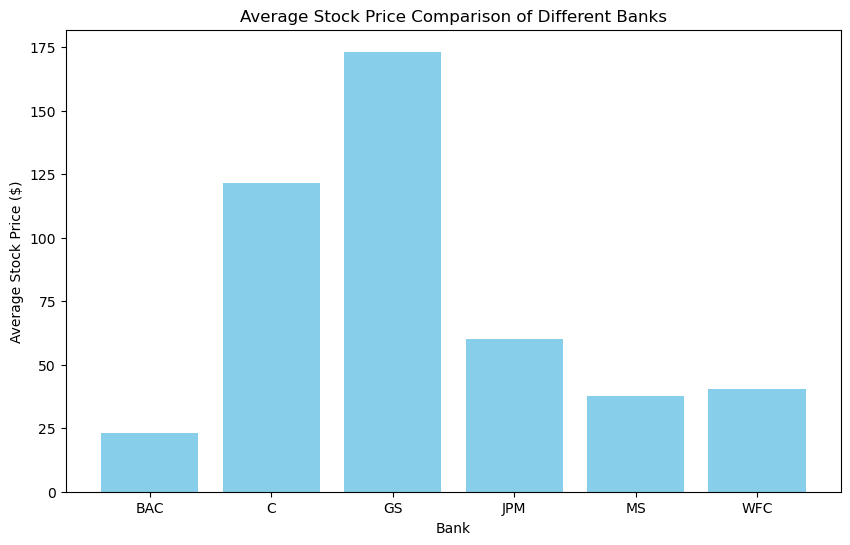

In [12]:
# Load data for all banks
banks = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_data = {}

for bank in banks:
    df = pd.read_csv(f'US_Bank_stock_price_data/{bank}.csv')


    df['Date'] = pd.to_datetime(df['Date'])
    bank_data[bank] = df
# Store the DataFrame in an individual variable
    globals()[f"{bank.lower()}_df"] = df  # This will create variables like bac_df, c_df, etc.
# Calculate the average closing price for each bank
average_prices = {bank: data['Close'].mean() for bank, data in bank_data.items()}

# Bar Plot: Average stock price comparison
plt.figure(figsize=(10, 6))
plt.bar(average_prices.keys(), average_prices.values(), color='skyblue')
plt.title('Average Stock Price Comparison of Different Banks')
plt.xlabel('Bank')
plt.ylabel('Average Stock Price ($)')
plt.show()


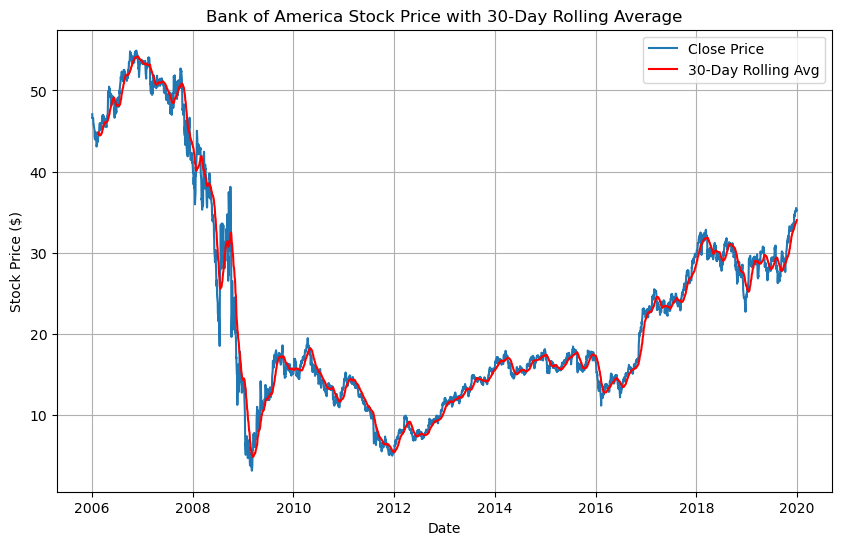

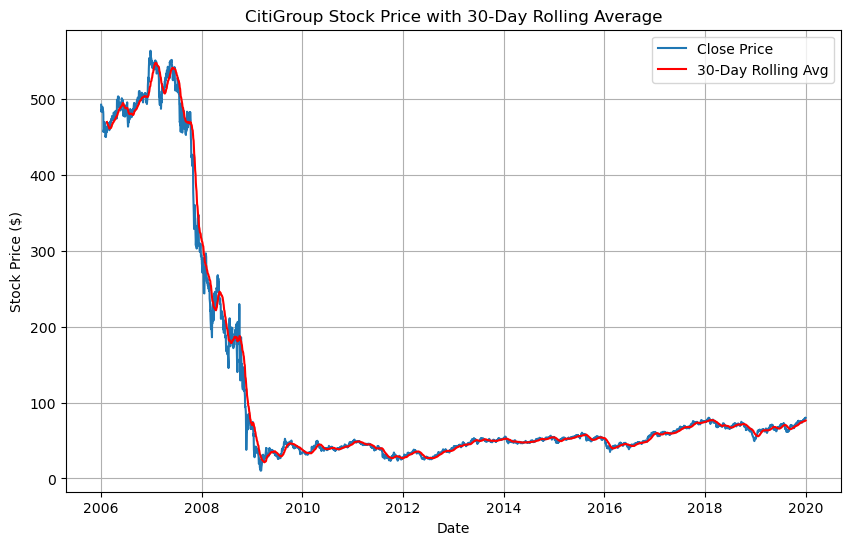

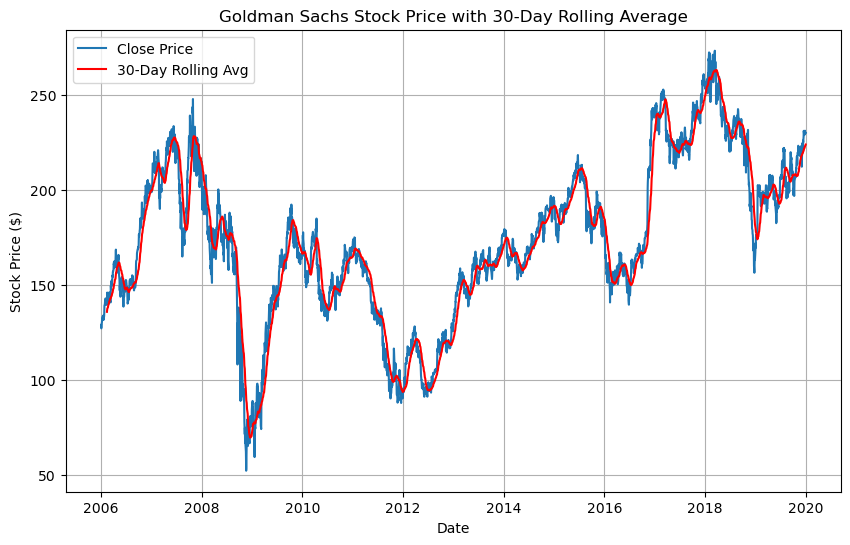

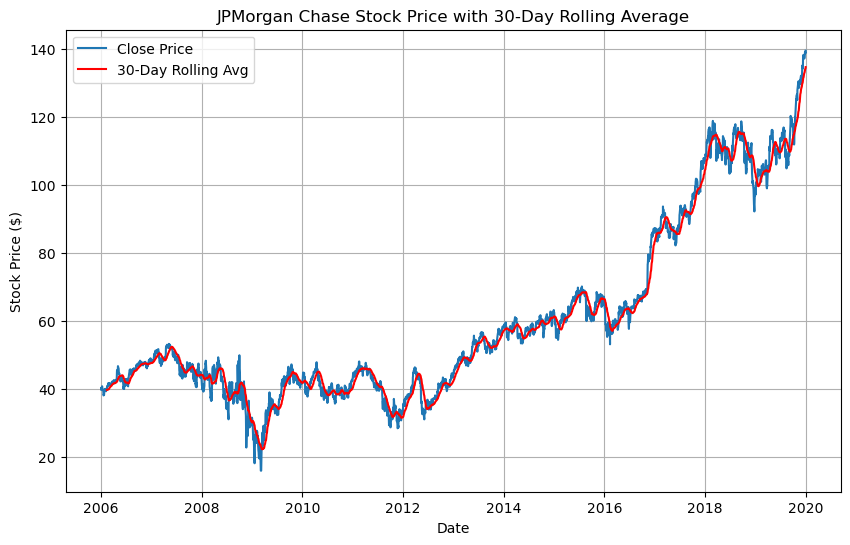

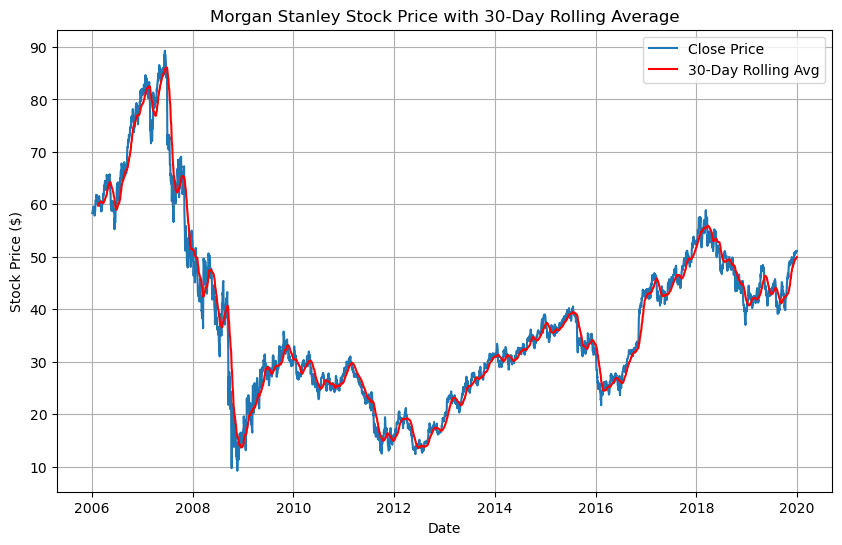

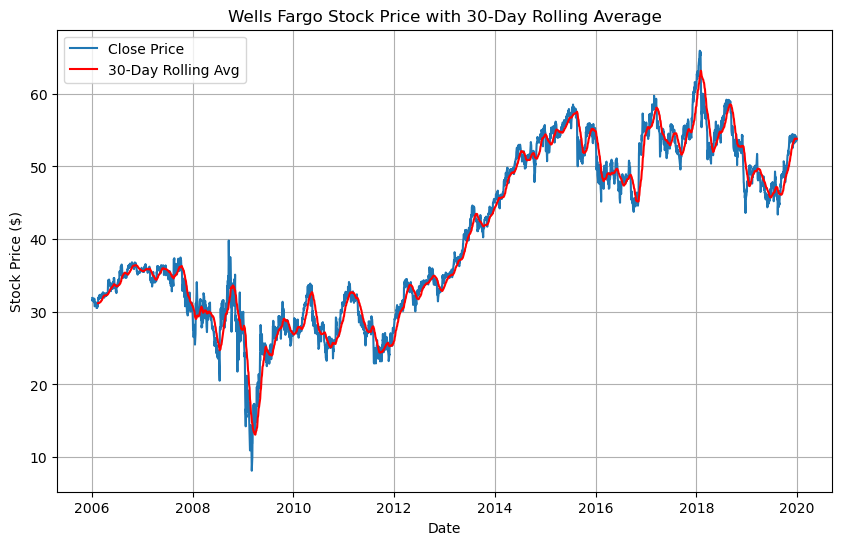

In [16]:
# List of bank DataFrame names and corresponding labels
bank_labels = {
    'BAC': 'Bank of America',
    'C': 'CitiGroup',
    'GS': 'Goldman Sachs',
    'JPM': 'JPMorgan Chase',
    'MS': 'Morgan Stanley',
    'WFC': 'Wells Fargo'
}

# Loop through each bank in the bank_data dictionary
for bank, df in bank_data.items():
    # Calculate the 30-day rolling average and standard deviation
    df['Rolling_Avg'] = df['Close'].rolling(window=30).mean()
    df['Rolling_Std'] = df['Close'].rolling(window=30).std()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['Rolling_Avg'], label='30-Day Rolling Avg', color='red')
    plt.title(f'{bank_labels[bank]} Stock Price with 30-Day Rolling Average')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

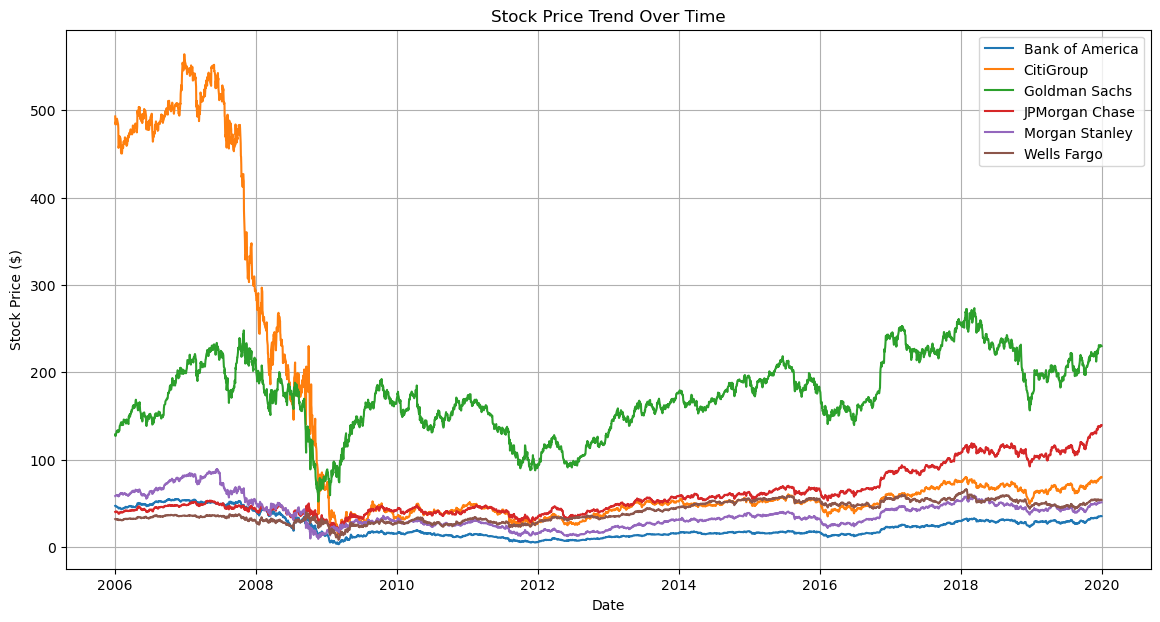

In [17]:
# 1. Line Plot - To show the stock price trend over time.
plt.figure(figsize=(14, 7))
for bank, df in bank_data.items():
    plt.plot(df['Date'], df['Close'], label=bank_labels[bank])
plt.title('Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.show()

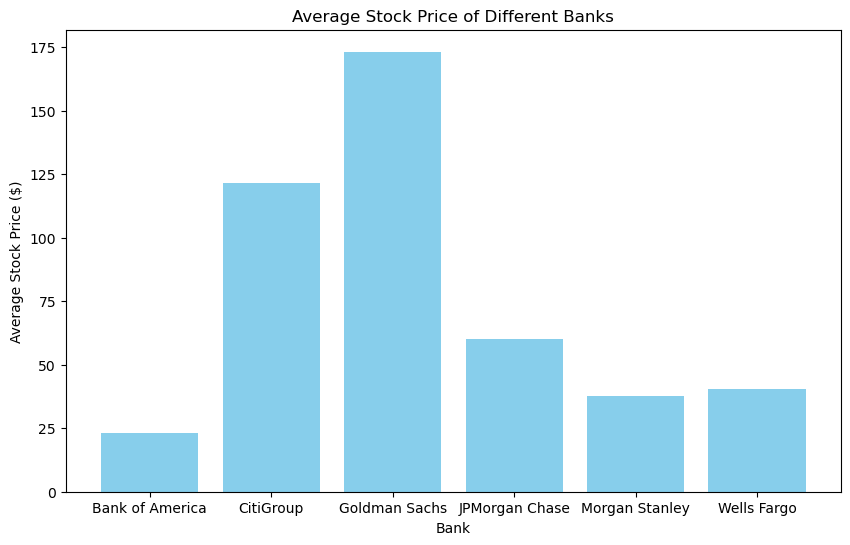

In [18]:
# 2. Bar Plot - To compare the average stock price of different banks.
avg_prices = {bank: df['Close'].mean() for bank, df in bank_data.items()}
plt.figure(figsize=(10, 6))
plt.bar(bank_labels.values(), avg_prices.values(), color='skyblue')
plt.title('Average Stock Price of Different Banks')
plt.xlabel('Bank')
plt.ylabel('Average Stock Price ($)')
plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

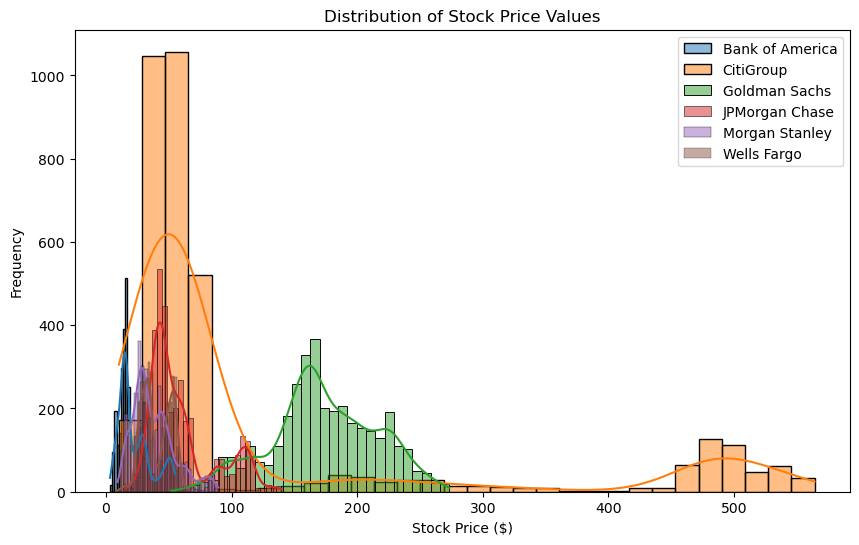

In [23]:
# 3. Histogram - To show the distribution of stock price values.
plt.figure(figsize=(10, 6))
for bank, df in bank_data.items():
    sns.histplot(df['Close'], label=bank_labels[bank], kde=True, bins=30)
plt.title('Distribution of Stock Price Values')
plt.xlabel('Stock Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

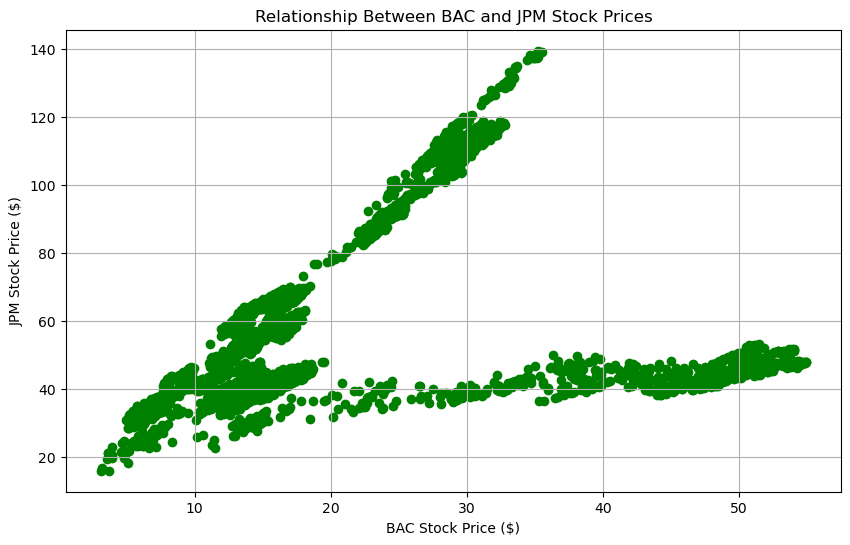

In [27]:
# 4. Scatter Plot - To visualize the relationship between the stock prices of two banks.
# Example: Scatter plot between BAC and JPM
plt.figure(figsize=(10, 6))
plt.scatter(bank_data['BAC']['Close'], bank_data['JPM']['Close'], color='green')
plt.title('Relationship Between BAC and JPM Stock Prices')
plt.xlabel('BAC Stock Price ($)')
plt.ylabel('JPM Stock Price ($)')
plt.grid(True)
plt.show()


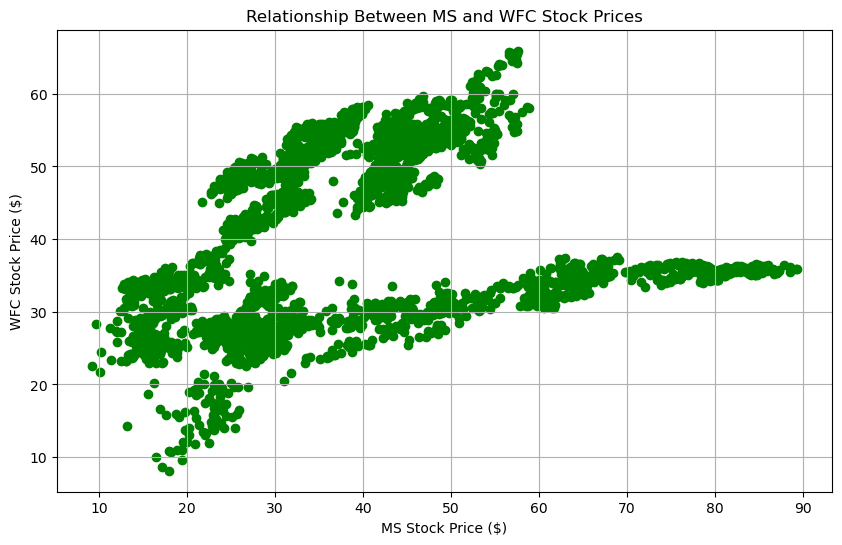

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(bank_data['MS']['Close'], bank_data['WFC']['Close'], color='green')
plt.title('Relationship Between MS and WFC Stock Prices')
plt.xlabel('MS Stock Price ($)')
plt.ylabel('WFC Stock Price ($)')
plt.grid(True)
plt.show()

<H4>Positive correlation for the above two scatter-plots


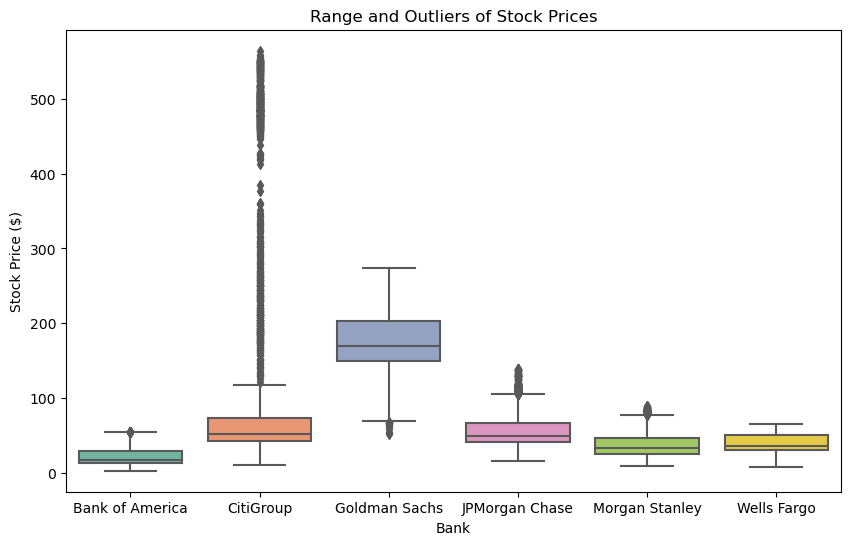

In [30]:
# 5. Box Plot - To display the range and outliers of stock prices.
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['Close'] for df in bank_data.values()], palette='Set2')
plt.title('Range and Outliers of Stock Prices')
plt.xlabel('Bank')
plt.ylabel('Stock Price ($)')
plt.xticks(ticks=range(len(banks)), labels=bank_labels.values())
plt.show()